# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

<h1>Dataset</h1>
Dataset berasal dari Kaggle (yang di rekomendasikan pada halaman instruksi) : <br>
https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [195]:
#Type your code here
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import mode
import kagglehub

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [147]:
#Type your code here
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [148]:
# !kaggle datasets download -d valakhorasani/bank-transaction-dataset-for-fraud-detection

# ! unzip "bank-transaction-dataset-for-fraud-detection.zip"

In [149]:
df = pd.read_csv("bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [150]:
#Type your code here
col = df.columns
print(col)
print(len(col))

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')
16


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [152]:
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


In [153]:
df.duplicated().sum()

np.int64(0)

In [154]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [155]:
df.nunique()

,0
TransactionID,2512
AccountID,495
TransactionAmount,2455
TransactionDate,2512
TransactionType,2
Location,43
DeviceID,681
IP Address,592
MerchantID,100
Channel,3


In [156]:
df.describe(include = "all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [157]:
num_type = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
obj_type = df.select_dtypes(include=["object"]).columns.tolist()
num_type

['TransactionAmount',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

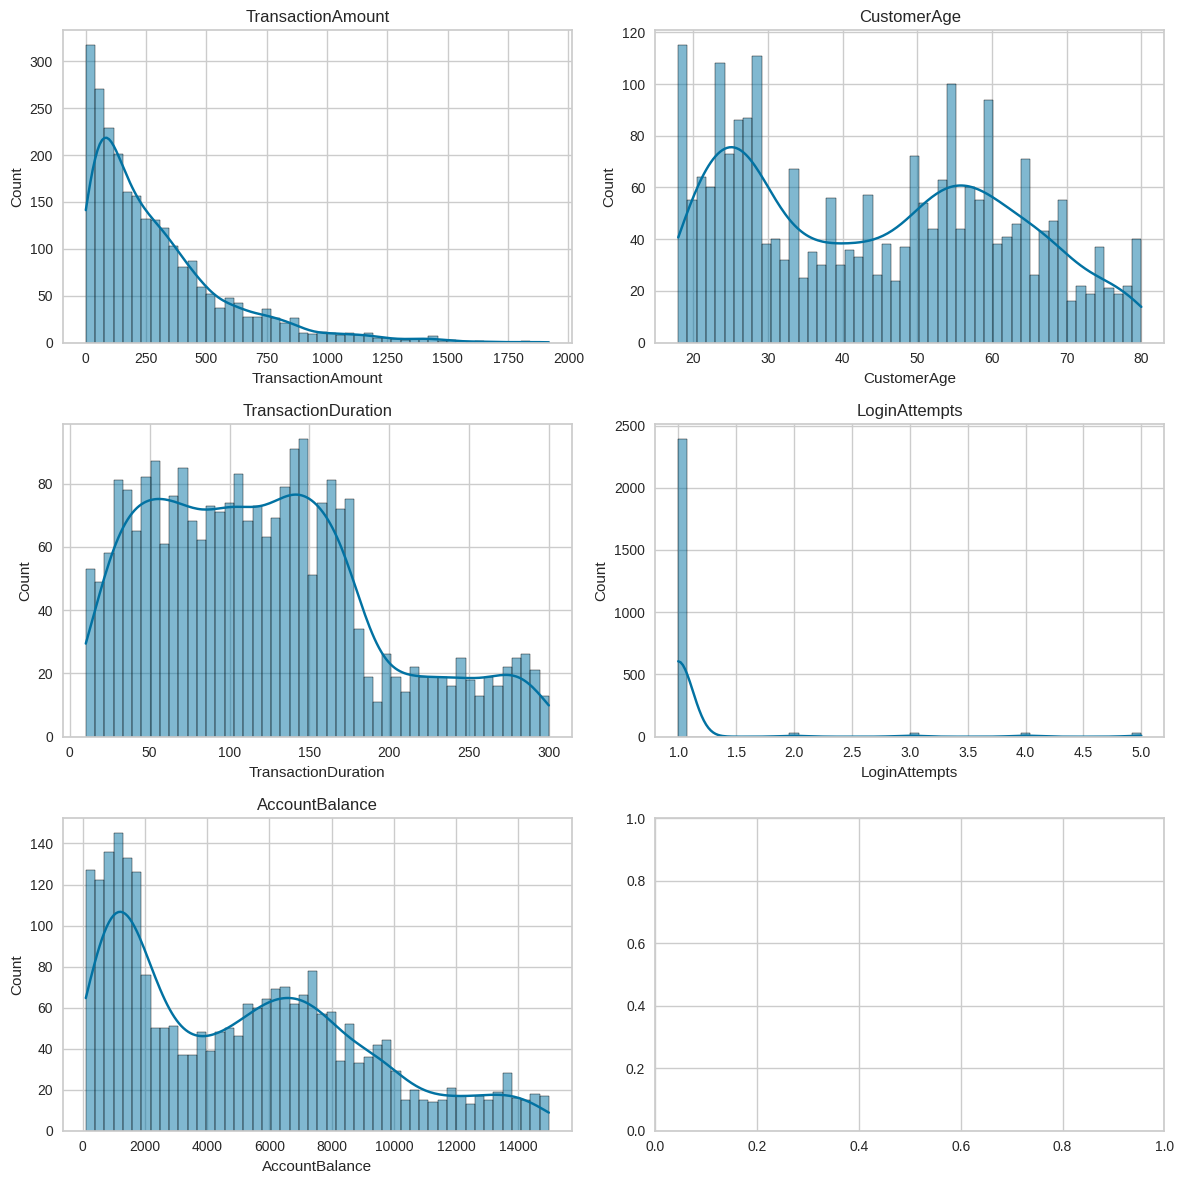

In [158]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.histplot(df[num_type[0]], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(num_type[0])

sns.histplot(df[num_type[1]], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title(num_type[1])

sns.histplot(df[num_type[2]], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(num_type[2])

sns.histplot(df[num_type[3]], bins=50, kde=True, ax=axes[1,1])
axes[1,1].set_title(num_type[3])

sns.histplot(df[num_type[4]], bins=50, kde=True, ax=axes[2, 0])
axes[2, 0].set_title(num_type[4])

plt.tight_layout()
plt.show()

Pada histogram diatas, dapat diperhatikan beberapa hal :
- Jumlah uang yang transaksi banyak pada range 0 -250
- Attempt login hanya dilakukan sekali, dengan maksimal merupakan 5
- Account balance banyak pada range 0 - 2000
- durasi transaksi sangat bervariatas pada range 0-200
- Umur orang yang melakukan transaksi juga sangat bervariatas, dengan range umur 20-80 dengan puncak pada age group 20-30 dan 50-60


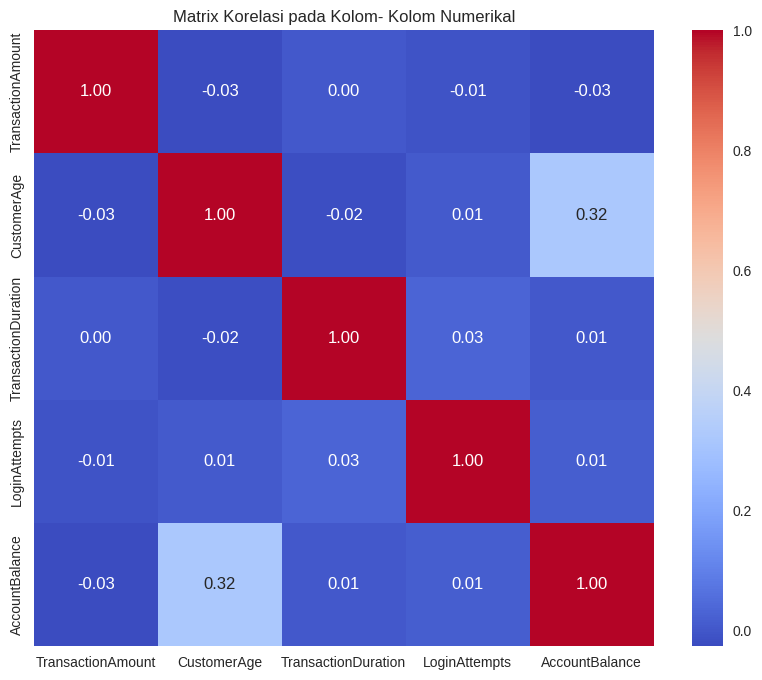

In [159]:
corr_matrix = df[num_type].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matrix Korelasi pada Kolom- Kolom Numerikal')
plt.show()

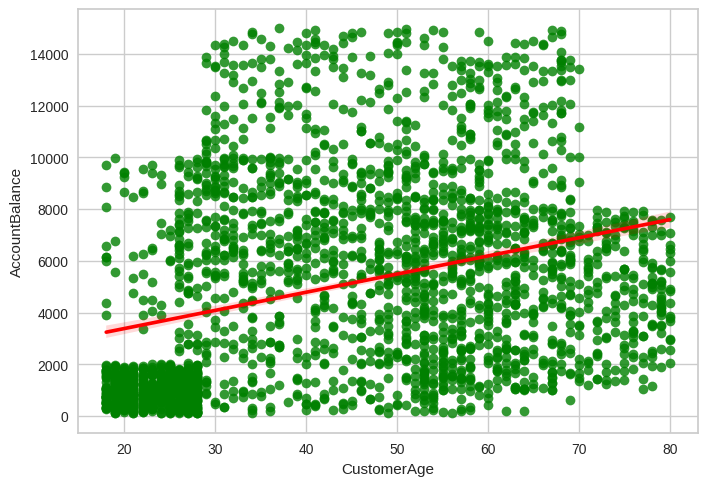

In [160]:
sns.regplot(x=df["CustomerAge"], y=df["AccountBalance"], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.show()

Dapat diperhatikan baha terdapat trend lemah positive terhadap jumlah uang dalam account dengan umur, dimana terdapat variance yang tinggi pada umur yang cukup tinggi dan balance yang rendah untuk umur yang masih kecil.

Tetapi dapat diperlihat bahwa tersbentuk beberapa kluster pada grafik tersebut

In [161]:
print(df["Location"].nunique())
obj_type

43


['TransactionID',
 'AccountID',
 'TransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'Channel',
 'CustomerOccupation',
 'PreviousTransactionDate']

<ipython-input-162-6cfeb36b97e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionType', data=df, palette='PuBu')


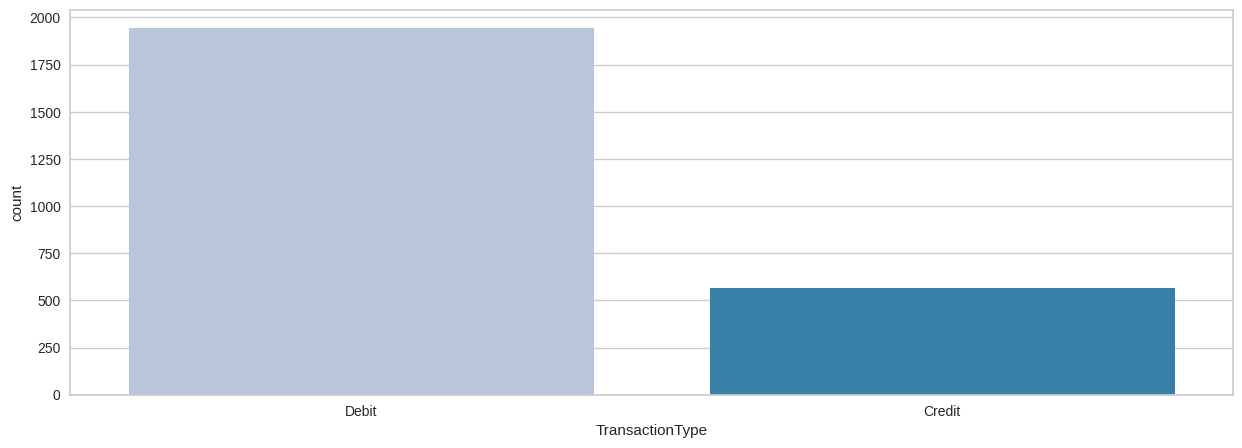

In [162]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(x='TransactionType', data=df, palette='PuBu')
plt.show()


Dapat diperhatikan bahwa jumlah pemakai debit levbih tinggi dibandingkan credit

<ipython-input-163-21a4be101e15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=df, palette='PuRd')


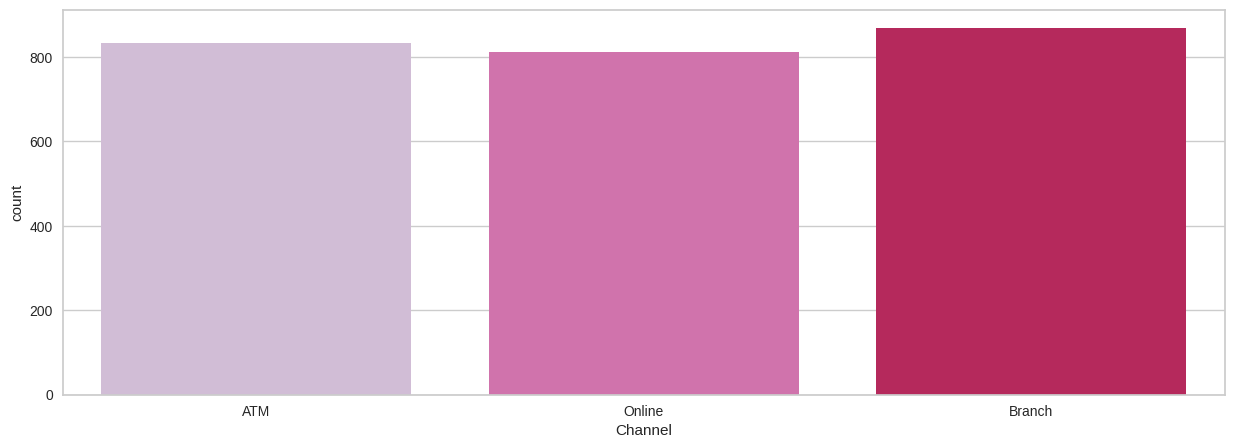

In [163]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(x='Channel', data=df, palette='PuRd')
plt.show()

Dispersi antara ketiga jenis channel cukup rata

<ipython-input-164-6db6e070a58c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerOccupation', data=df, palette='OrRd')


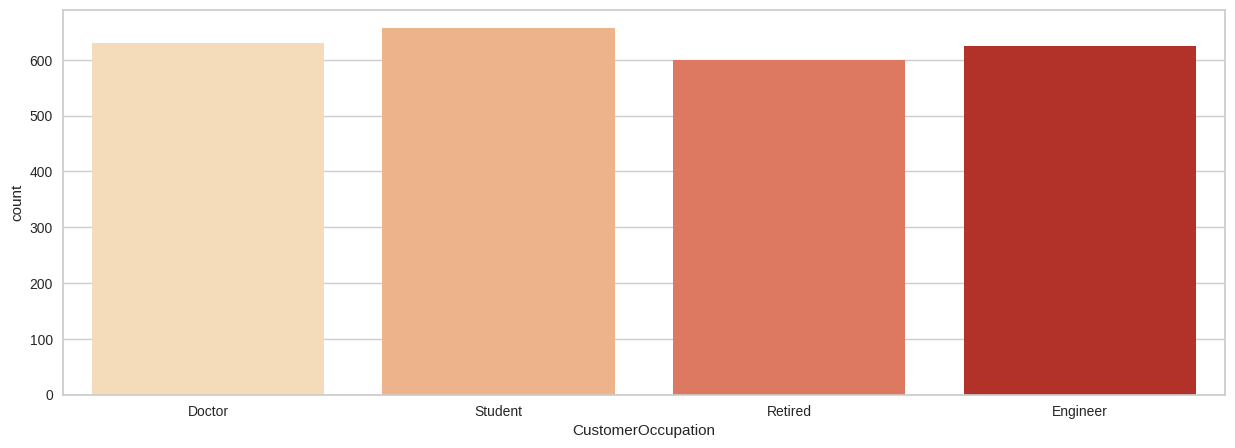

In [164]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(x='CustomerOccupation', data=df, palette='OrRd')
plt.show()

Jenis perkejaan juga cukup dipersif pada keempat jenisnya, dimana mahasiswa/pelajar paling banyak

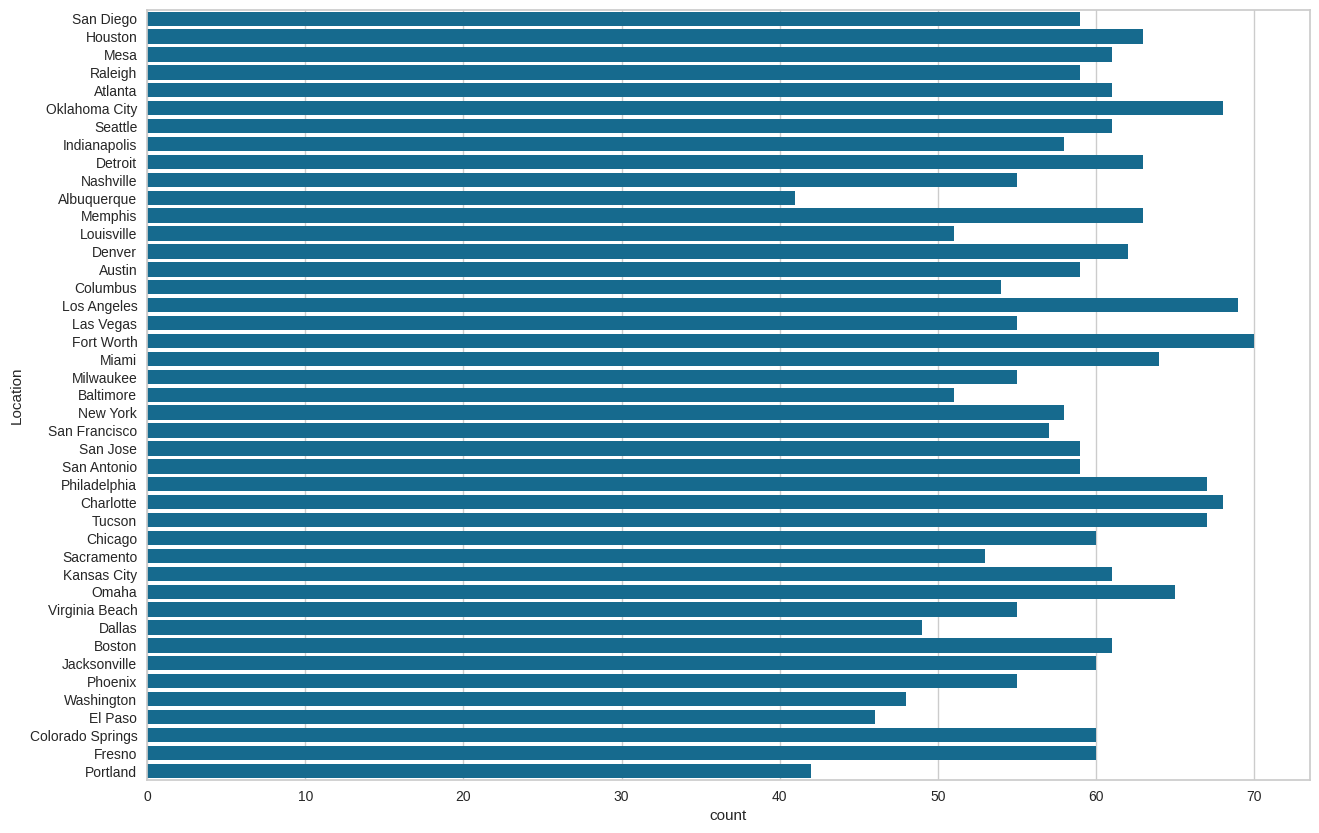

In [165]:
plt.figure(1 , figsize = (15 , 10))
sns.countplot(y = 'Location' , data = df)
plt.show()

Dapat diperhatikan bahwa terdapat 43 lokasi berbeda dengan count yang cukup dispersif antara kota - kota tersebut, dengan paling sedikit memphis

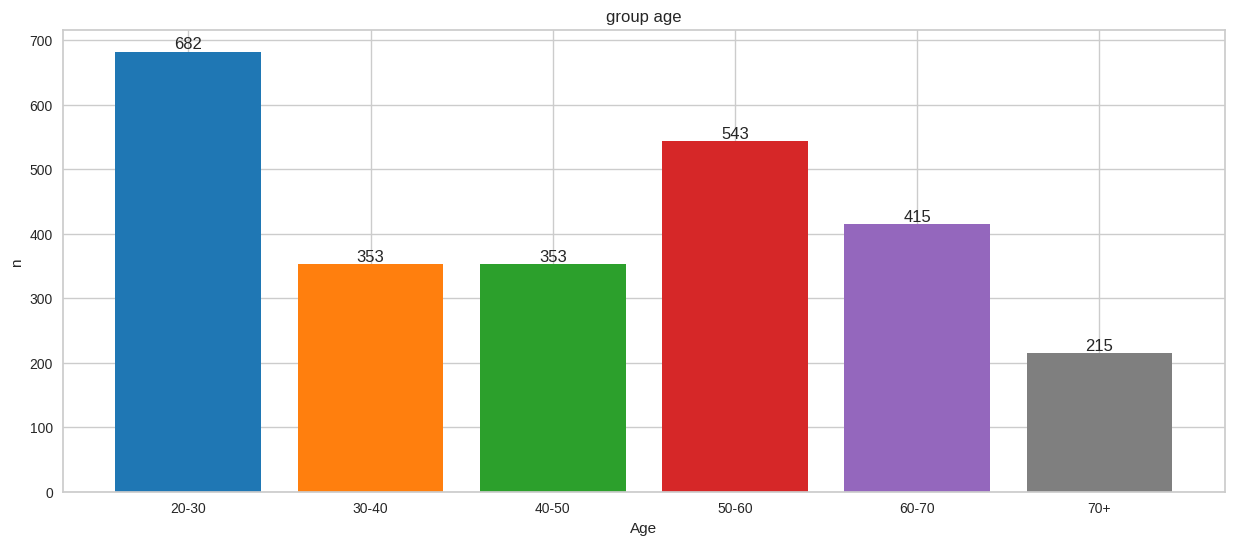

In [166]:
#binning berdasarkan umurnya
age20_30 = df[(df["CustomerAge"] >= 20) & (df["CustomerAge"] <= 30)]
age30_40 = df[(df["CustomerAge"] >= 30) & (df["CustomerAge"] <= 40)]
age40_50 = df[(df["CustomerAge"] >= 40) & (df["CustomerAge"] <= 50)]
age50_60 = df[(df["CustomerAge"] >= 50) & (df["CustomerAge"] <= 60)]
age60_70 = df[(df["CustomerAge"] >= 60) & (df["CustomerAge"] <= 70)]
age_70up = df[df["CustomerAge"] >= 70]

x = ["20-30", "30-40", "40-50", "50-60", "60-70", "70+"]
y = [len(age20_30.values), len(age30_40.values), len(age40_50.values), len(age50_60.values), len(age60_70.values), len(age_70up.values)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:gray'])
plt.title("group age")
plt.xlabel("Age")
plt.ylabel("n")
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
plt.show()

Dapat diperhatikan :
- pelanggan terbanyak pada range 20-30
- pelanggan umur 30-40 dan 40-50 memiliki jumlah yang sama

Berdasarkan hasil periksa dataset, dapat diperhatikan bahwa terdapat 16 kolom yang terdapat pada dataset ini, dimana setelah dilihat jenis data yang digunakan dalam dataset ini, terdapat berbagai jenis data yang dipakai yaitu object, float, dan int.

Setelah dilihat untuk value Null pada dataset, terdeteksi tidak terdapat data yang null. Hal ini berarti bagus, dengan maksud dataset tidak diperlukan dilakukan penghapusan/pengisian nilai pada nilai - nilai null.

Tidak terdapat row duplikat

Terdapat beberapa hal yang harus dilakukan, mulai dengan normalisasi data dan encoding

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Dalam bagian ini akan dilakukan:
- Penghapusan kolom - kolom tidak penting
- Normalisasi
- Encoding
- Binning
- Deteksi Outlier

Kolom berisi ID tidak diperlukan, maka akan dihapuskan


In [167]:
#Type your code here
df_filtered = df.drop(['TransactionID',
 'AccountID','DeviceID',
 'IP Address',
 'MerchantID', "TransactionDate", "PreviousTransactionDate"], axis=1)
df_filtered

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40
...,...,...,...,...,...,...,...,...,...
2507,856.21,Credit,Colorado Springs,Branch,33,Doctor,109,1,12690.79
2508,251.54,Debit,Tucson,Branch,48,Doctor,177,1,254.75
2509,28.63,Debit,San Diego,Branch,56,Retired,146,1,3382.91
2510,185.97,Debit,Denver,Online,23,Student,19,1,1776.91


In [168]:
encoder_type = LabelEncoder()
encoder_channel = LabelEncoder()
encoder_cus = LabelEncoder()
encoder_loc =LabelEncoder()

df_filtered['TransactionType'] = encoder_type.fit_transform(df_filtered['TransactionType'])
df_filtered['Channel'] = encoder_channel.fit_transform(df_filtered['Channel'])
df_filtered["CustomerOccupation"] = encoder_cus.fit_transform(df_filtered["CustomerOccupation"])
df_filtered["Location"] = encoder_loc.fit_transform(df_filtered["Location"])

df_filtered

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70,0,81,1,5112.21
1,376.24,1,15,0,68,0,141,1,13758.91
2,126.29,1,23,2,19,3,56,1,1122.35
3,184.50,1,33,2,26,3,25,1,8569.06
4,13.45,0,1,2,26,3,198,1,7429.40
...,...,...,...,...,...,...,...,...,...
2507,856.21,0,7,1,33,0,109,1,12690.79
2508,251.54,1,40,1,48,0,177,1,254.75
2509,28.63,1,36,1,56,2,146,1,3382.91
2510,185.97,1,10,2,23,3,19,1,1776.91


Tujuan dari encoder ini adalah untuk merubah data kategorical menjadi numerik

In [169]:
#outliers
num_filtered = df_filtered[['TransactionAmount',
                             'CustomerAge',
                             'TransactionDuration',
                             'LoginAttempts',
                             'AccountBalance']]

# copy
num_filtered_copy = num_filtered.copy()
outlier_indices = set()

for col in num_filtered.columns:
    Q1 = num_filtered[col].quantile(0.25)
    Q3 = num_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR
    col_outliers = num_filtered_copy[(num_filtered_copy[col] < lower_bound) | (num_filtered_copy[col] > upper_bound)].index

    print(f"Outliers pada kolom {col}:")
    print(num_filtered_copy.loc[col_outliers])
    outlier_indices.update(col_outliers)

num_filtered_cleaned = num_filtered_copy.drop(index=outlier_indices)

Outliers pada kolom TransactionAmount:
      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
9                815.96           55                  120              1   
13               781.76           26                  123              1   
33               877.81           22                  150              1   
38               795.31           66                   90              2   
74              1212.51           20                   24              1   
...                 ...          ...                  ...            ...   
2466             883.92           53                  129              1   
2468             768.94           64                   53              1   
2474             865.17           24                  161              1   
2493             856.90           36                  150              1   
2507             856.21           33                  109              1   

      AccountBalance  
9            1021.88  
13

In [170]:
num_filtered_cleaned

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40
...,...,...,...,...,...
2506,92.24,60,93,1,6937.48
2508,251.54,48,177,1,254.75
2509,28.63,56,146,1,3382.91
2510,185.97,23,19,1,1776.91


In [171]:
def boxplot(col, df):
  plt.figure(figsize=(6, 4))
  sns.boxplot(x= df[col])
  plt.title(f"Boxplot untuk {col}")
  plt.show()

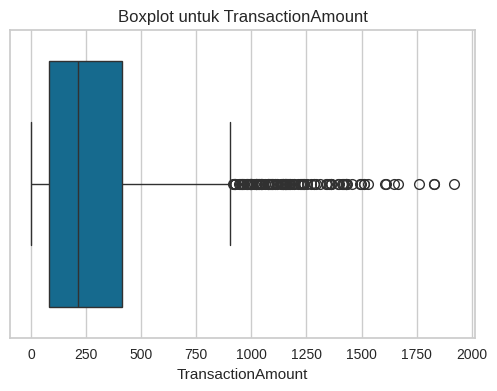

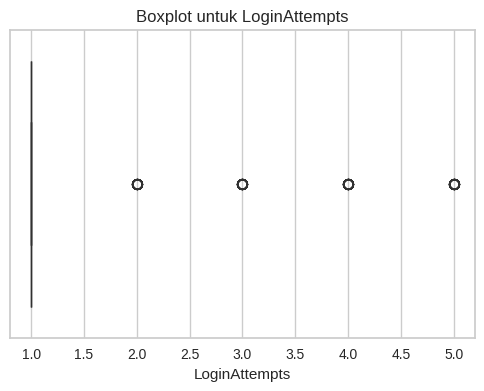

In [172]:
#before
boxplot("TransactionAmount", num_filtered)
boxplot("LoginAttempts", num_filtered)

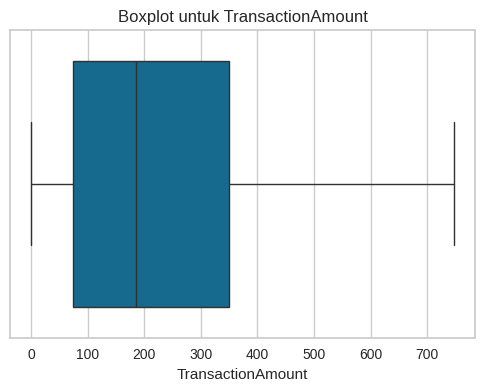

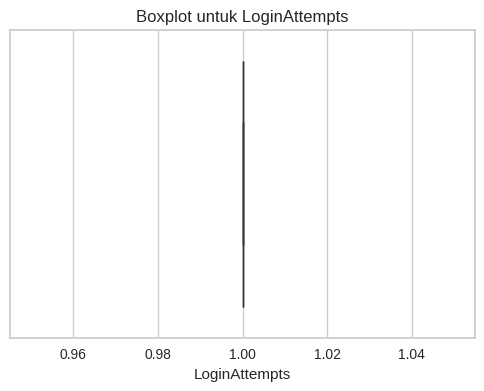

In [173]:
boxplot("TransactionAmount", num_filtered_cleaned)
boxplot("LoginAttempts", num_filtered_cleaned)

Dapat diperhatikan terdapat penurunan jumlah outlier

In [174]:
#concat dengan dataset awal
df_filtered = df_filtered.loc[num_filtered_cleaned.index].copy()
df_filtered

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70,0,81,1,5112.21
1,376.24,1,15,0,68,0,141,1,13758.91
2,126.29,1,23,2,19,3,56,1,1122.35
3,184.50,1,33,2,26,3,25,1,8569.06
4,13.45,0,1,2,26,3,198,1,7429.40
...,...,...,...,...,...,...,...,...,...
2506,92.24,1,30,1,60,1,93,1,6937.48
2508,251.54,1,40,1,48,0,177,1,254.75
2509,28.63,1,36,1,56,2,146,1,3382.91
2510,185.97,1,10,2,23,3,19,1,1776.91


Outlier - outlier telah dihapuskan dari dataset utana

In [175]:
#binning menggunakan pada umur, amount balance, dan transaction amount
df_filtered["CustomerAge_bin"] = pd.cut(df_filtered["CustomerAge"], bins=4, labels=[1, 2, 3, 4])
df_filtered["AccountBalance_bin"] = pd.cut(df_filtered["CustomerAge"], bins=4, labels=[1, 2, 3, 4])
df_filtered["TransactionAmount_bin"] = pd.cut(df_filtered["CustomerAge"], bins=4, labels=[1, 2, 3, 4])

In [176]:
df_filtered

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,AccountBalance_bin,TransactionAmount_bin
0,14.09,1,36,0,70,0,81,1,5112.21,4,4,4
1,376.24,1,15,0,68,0,141,1,13758.91,4,4,4
2,126.29,1,23,2,19,3,56,1,1122.35,1,1,1
3,184.50,1,33,2,26,3,25,1,8569.06,1,1,1
4,13.45,0,1,2,26,3,198,1,7429.40,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2506,92.24,1,30,1,60,1,93,1,6937.48,3,3,3
2508,251.54,1,40,1,48,0,177,1,254.75,2,2,2
2509,28.63,1,36,1,56,2,146,1,3382.91,3,3,3
2510,185.97,1,10,2,23,3,19,1,1776.91,1,1,1


Digunakan pd.cut karena dipotong berdasarkan interval

In [177]:
#scaling
scaler = MinMaxScaler()
df_filtered_scaled = scaler.fit_transform(df_filtered)
df_filtered_scaled = pd.DataFrame(df_filtered_scaled, columns=df_filtered.columns)
df_filtered_scaled

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,AccountBalance_bin,TransactionAmount_bin
0,0.018526,1.0,0.857143,0.0,0.838710,0.000000,0.285141,0.0,0.364520,1.000000,1.000000,1.000000
1,0.503644,1.0,0.357143,0.0,0.806452,0.000000,0.526104,0.0,0.993520,1.000000,1.000000,1.000000
2,0.168823,1.0,0.547619,1.0,0.016129,1.000000,0.184739,0.0,0.074279,0.000000,0.000000,0.000000
3,0.246798,1.0,0.785714,1.0,0.129032,1.000000,0.060241,0.0,0.615987,0.000000,0.000000,0.000000
4,0.017669,0.0,0.023810,1.0,0.129032,1.000000,0.755020,0.0,0.533083,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0.123212,1.0,0.714286,0.5,0.677419,0.333333,0.333333,0.0,0.497298,0.666667,0.666667,0.666667
2012,0.336602,1.0,0.952381,0.5,0.483871,0.000000,0.670683,0.0,0.011166,0.333333,0.333333,0.333333
2013,0.038003,1.0,0.857143,0.5,0.612903,0.666667,0.546185,0.0,0.238723,0.666667,0.666667,0.666667
2014,0.248768,1.0,0.238095,1.0,0.080645,1.000000,0.036145,0.0,0.121895,0.000000,0.000000,0.000000


Digunakan scaling untuk bikin data dalam range yang sama, setelah itu dimasukkan ke dalam sebuah df

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [178]:
#fit model
clusterModel = KMeans(n_clusters = 4, random_state=32)
df_filtered_scaled['cluster']= clusterModel.fit_predict(df_filtered_scaled)

Model yang digunakan adalah KMeans, dimana jumlah cluster awal yang dibuat adalah 4.

untuk feature yang dipakai merupakan TransactionAmount dan Transaction Dureation dalam menentukan jika terjadi Fraud dalam transaksi.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

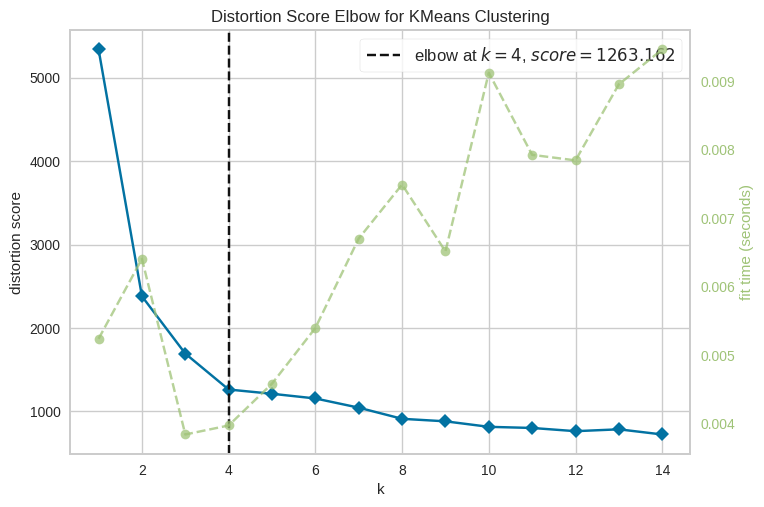

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [179]:
#Type your code here
#Elbow Method
clusterModel = KMeans()
visualizer = KElbowVisualizer(clusterModel, k=(1,15))
visualizer.fit(df_filtered_scaled)
visualizer.show()

Berdasarkan Elbow method, jumlah cluster optimal adalah 4

In [180]:
#Type your code here
eval = silhouette_score(df_filtered_scaled.iloc[:,:-1], df_filtered_scaled['cluster'])
print(eval)

0.23491374492111447


Hasil yang diperoleh cukup buruk, dimana kluster-kluster tidak terlalu dipisahkan. Hal ini berarti diperlukan tuning ulang.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [181]:
#Type your code here
#mutual info

mutualInfo_scores = mutual_info_classif(df_filtered_scaled.drop('cluster', axis=1), df_filtered_scaled['cluster'])
mutualInfo_series = pd.Series(mutualInfo_scores, index=df_filtered_scaled.drop('cluster', axis=1).columns)

selected_features = mutualInfo_series[mutualInfo_series > 0.01].index
df_selected = df_filtered_scaled[selected_features]

In [182]:
df_selected

,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance,CustomerAge_bin,AccountBalance_bin,TransactionAmount_bin
0,1.0,0.0,0.838710,0.000000,0.364520,1.000000,1.000000,1.000000
1,1.0,0.0,0.806452,0.000000,0.993520,1.000000,1.000000,1.000000
2,1.0,1.0,0.016129,1.000000,0.074279,0.000000,0.000000,0.000000
3,1.0,1.0,0.129032,1.000000,0.615987,0.000000,0.000000,0.000000
4,0.0,1.0,0.129032,1.000000,0.533083,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2011,1.0,0.5,0.677419,0.333333,0.497298,0.666667,0.666667,0.666667
2012,1.0,0.5,0.483871,0.000000,0.011166,0.333333,0.333333,0.333333
2013,1.0,0.5,0.612903,0.666667,0.238723,0.666667,0.666667,0.666667
2014,1.0,1.0,0.080645,1.000000,0.121895,0.000000,0.000000,0.000000


In [183]:
clusterModel_fs = KMeans(n_clusters = 4, random_state=32)
df_selected['cluster']= clusterModel_fs.fit_predict(df_selected)
eval_fs = silhouette_score(df_selected.iloc[:,:-1], df_selected['cluster'])
print(eval_fs)

0.3080882388177536


<ipython-input-183-b812b51ce804>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster']= clusterModel_fs.fit_predict(df_selected)


Mutual Information membuat ranking fitur berdasarkan relevansinyya terhadap cluster.

Dapat diperhatikan terdapat kenaikan dalam hasil evaluasi.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [184]:
#Type your code here

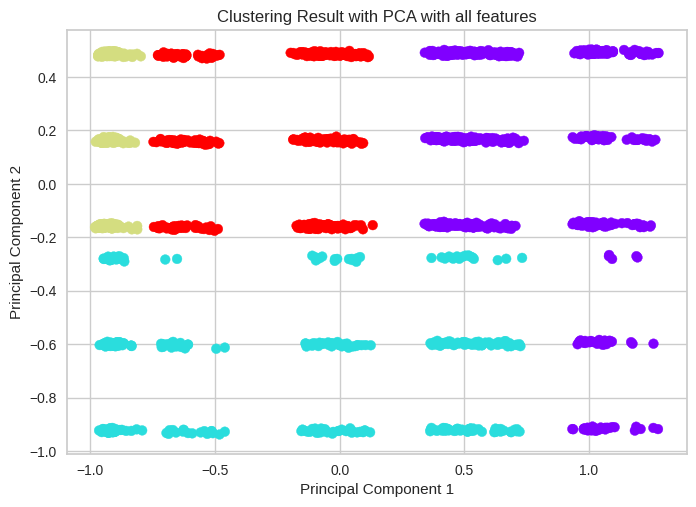

In [185]:
#untuk analisa, maka digunakan PCA untuk megurangi dimensi menjadi 2
#untuk yang menggunakan full fitur

pca = PCA(n_components=2)
df_filtered_scaled_pca = pca.fit_transform(df_filtered_scaled.drop('cluster', axis=1))

plt.scatter(df_filtered_scaled_pca[:, 0], df_filtered_scaled_pca[:, 1], c=df_filtered_scaled['cluster'], cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Result with PCA with all features')
plt.show()

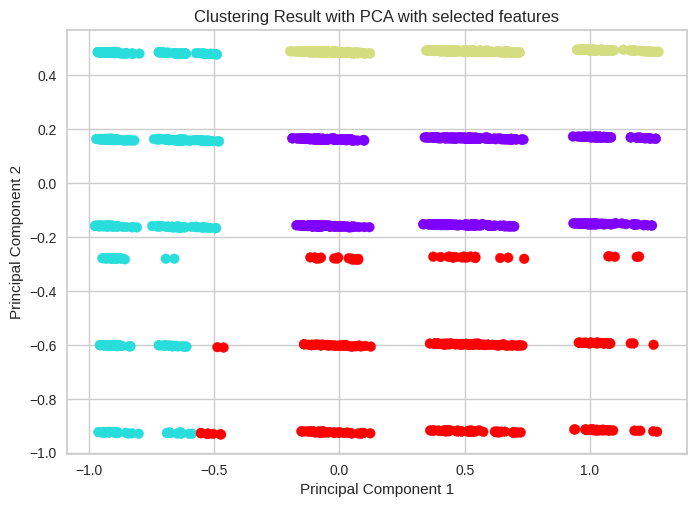

In [186]:
pca_fs = PCA(n_components=2)
df_fs_pca = pca_fs.fit_transform(df_selected.drop('cluster', axis=1))

plt.scatter(df_fs_pca[:, 0], df_fs_pca[:, 1], c=df_selected['cluster'], cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Result with PCA with selected features')
plt.show()

In [187]:
pca_fs.components_

array([[-1.34805458e-02, -1.03560681e-02,  3.88064650e-01,
        -2.50267637e-01,  1.62254926e-01,  5.03374050e-01,
         5.03374050e-01,  5.03374050e-01],
       [ 7.64596758e-01, -6.44420623e-01,  1.91664828e-03,
         4.99214714e-04, -9.12929474e-03,  2.97720593e-03,
         2.97720593e-03,  2.97720593e-03]])

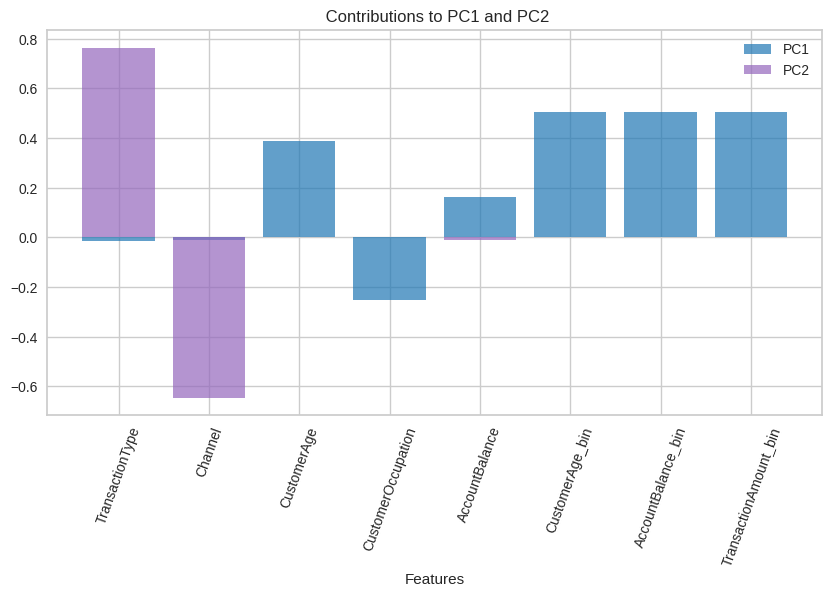

In [188]:
features = df_selected.columns[:-1]
pc1_loadings = pca_fs.components_[0]
pc2_loadings = pca_fs.components_[1]

plt.figure(figsize=(10,5))
plt.bar(features, pc1_loadings, alpha=0.7, label="PC1", color= 'tab:blue')
plt.bar(features, pc2_loadings, alpha=0.7, label="PC2", color='tab:purple')
plt.xlabel("Features")
plt.xticks(rotation=70)
plt.legend()
plt.title(" Contributions to PC1 and PC2")
plt.show()

In [205]:
#statistik masing - masing kluster
def mode_ext(series):
  mode_value = series.mode()
  return mode_value[0]

agg_results = df_selected.groupby('cluster').agg({
    col: ['mean', 'median', mode_ext] for col in df_selected.columns[:-1]
})

agg_results.columns = [f"{feature}_{stat}" for feature, stat in agg_results.columns]
print(agg_results)

         TransactionType_mean  TransactionType_median  \
cluster                                                 
0                    1.000000                     1.0   
1                    0.796919                     1.0   
2                    1.000000                     1.0   
3                    0.000000                     0.0   

         TransactionType_mode_ext  Channel_mean  Channel_median  \
cluster                                                           
0                             1.0      0.737691             0.5   
1                             1.0      0.493697             0.5   
2                             1.0      0.000000             0.0   
3                             0.0      0.661765             0.5   

         Channel_mode_ext  CustomerAge_mean  CustomerAge_median  \
cluster                                                           
0                     0.5          0.600307            0.596774   
1                     0.5          0.111073          

Dapat diperhatikan bahwa cluster pada gambar kedua lebih terstruktur dan terpisah


Selain itu, tidak terdapat overlap pada gambar kedua. Artinya terjadi pemisahan yang lebih baik dibandingkan pada gambar pertama.

Pada grafik pca components, dapat dilihat kontribusi fitur terhadap PC1 dan PC2. PC1 merupakan paling banyak variance, sedangkan PC2 merupakan kedua paling banyak variance.

Untuk PC2, kontribusi terbesar dari TransactionType. Sedangkan untuk kontribusi PC1 terdapat dari CustomerAge_bin, AccountBalance_bin, dan TransactionAmount_bin.


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [189]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [190]:
# Type your code here

df_filtered_rev = scaler.inverse_transform(df_filtered_scaled.iloc[:,:-1])
df_filtered_rev = pd.DataFrame(df_filtered_rev, columns=df_filtered_scaled.columns[:-1])
df_filtered_rev

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,AccountBalance_bin,TransactionAmount_bin
0,14.09,1.0,36.0,0.0,70.0,0.0,81.0,1.0,5112.21,4.0,4.0,4.0
1,376.24,1.0,15.0,0.0,68.0,0.0,141.0,1.0,13758.91,4.0,4.0,4.0
2,126.29,1.0,23.0,2.0,19.0,3.0,56.0,1.0,1122.35,1.0,1.0,1.0
3,184.50,1.0,33.0,2.0,26.0,3.0,25.0,1.0,8569.06,1.0,1.0,1.0
4,13.45,0.0,1.0,2.0,26.0,3.0,198.0,1.0,7429.40,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,92.24,1.0,30.0,1.0,60.0,1.0,93.0,1.0,6937.48,3.0,3.0,3.0
2012,251.54,1.0,40.0,1.0,48.0,0.0,177.0,1.0,254.75,2.0,2.0,2.0
2013,28.63,1.0,36.0,1.0,56.0,2.0,146.0,1.0,3382.91,3.0,3.0,3.0
2014,185.97,1.0,10.0,2.0,23.0,3.0,19.0,1.0,1776.91,1.0,1.0,1.0


In [191]:
df_filtered_rev['TransactionType'] = encoder_type.inverse_transform(df_filtered_rev['TransactionType'].astype(int))
df_filtered_rev['Channel'] = encoder_channel.inverse_transform(df_filtered_rev['Channel'].astype(int))
df_filtered_rev["CustomerOccupation"] = encoder_cus.inverse_transform(df_filtered_rev["CustomerOccupation"].astype(int))
df_filtered_rev["Location"] = encoder_loc.inverse_transform(df_filtered_rev["Location"].astype(int))

In [192]:
df_fs = df_filtered_rev[df_selected.columns[:-1]]
df_final = pd.concat([df_fs, df_selected['cluster']], axis=1)
df_final

,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance,CustomerAge_bin,AccountBalance_bin,TransactionAmount_bin,cluster
0,Debit,ATM,70.0,Doctor,5112.21,4.0,4.0,4.0,2
1,Debit,ATM,68.0,Doctor,13758.91,4.0,4.0,4.0,2
2,Debit,Online,19.0,Student,1122.35,1.0,1.0,1.0,1
3,Debit,Online,26.0,Student,8569.06,1.0,1.0,1.0,1
4,Credit,Online,26.0,Student,7429.40,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
2011,Debit,Branch,60.0,Engineer,6937.48,3.0,3.0,3.0,0
2012,Debit,Branch,48.0,Doctor,254.75,2.0,2.0,2.0,0
2013,Debit,Branch,56.0,Retired,3382.91,3.0,3.0,3.0,0
2014,Debit,Online,23.0,Student,1776.91,1.0,1.0,1.0,1


- <h1> Cluster 0 </h1>

🔹 TransaksiType:

Rata-rata = 1.00, Median = 1.00, Modus = 1.00 → Hampir semua transaksi adalah debit

🔹 Channel:

Rata-rata = 0.74, Median = 0.5, Modus = 0.5 → Sebagian besar transaksi dilakukan melalui ATM dan Cabang, dengan sedikit lebih banyak di ATM.

🔹 CustomerAge:

Rata-rata = 0.60, Median = 0.60, Modus = 0.63 → Mayoritas pelanggan berada dalam rentang usia menengah.

- <h1> Cluster 1 </h1>

🔹 TransactionType:

Rata-rata = 0.80, Median = 1.00, Modus = 1.00 → Sebagian besar transaksi adalah debit, tetapi ada juga beberapa transaksi kredit.

🔹 Channnel:

Rata-rata = 0.49, Median = 0.5, Modus = 0.5 → Transaksi terbagi merata antara ATM dan Cabang.

🔹 CustomerAge:

Rata-rata = 0.11, Median = 0.11, Modus = 0.15 → Mayoritas pelanggan adalah anak muda.

- <h1> Clsuter 2 </h1>

🔹 TransactionType:

Rata-rata = 1.00, Median = 1.00, Modus = 1.00 → Semua transaksi dalam cluster ini adalah debit.

🔹 Channel:

Rata-rata = 0.00, Median = 0.00, Modus = 0.00 → Semua transaksi dilakukan melalui ATM.

🔹 CustomerAge:

Rata-rata = 0.62, Median = 0.63, Modus = 0.63 → Mayoritas pelanggan berada dalam usia menengah.

- <h1> Cluster 3 </h1>

🔹 TransactionType:

Rata-rata = 0.00, Median = 0.00, Modus = 0.00 → Semua transaksi dalam cluster ini adalah kredit (setoran atau transfer masuk).

🔹 Channel:

Rata-rata = 0.66, Median = 0.5, Modus = 0.5 → Sebagian besar transaksi dilakukan melalui Cabang dan ATM.

🔹 CustomerAge:

Rata-rata = 0.60, Median = 0.60, Modus = 0.56 → Mayoritas pelanggan berada dalam usia menengah.

<h1>Analisis :</h1>

* Cluster 0 : Pelanggan usia menengah yang sering melakukan transaksi debit menggunakan ATM dan Cabang, dengan saldo rekening sedang.

* Cluster 1 : Pelanggan muda yang melakukan transaksi debit melalui ATM dan Cabang, dengan saldo rekening sangat rendah.

* Cluster 2 : Pelanggan usia menengah yang hanya menggunakan ATM untuk transaksi debit, dengan saldo rekening rendah.

* Cluster 3 : Pelanggan usia menengah yang sering melakukan transaksi kredit melalui Cabang dan ATM, dengan saldo rekening lebih tinggi.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [193]:
df_final.to_csv('clustered_data.csv', index=True)